# Import the libraries that will be used throughout the examination of the data

In [1]:
# Importing important Libraries used by all
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import library for split and train
from sklearn.model_selection import train_test_split

# Import for linear Regression
from sklearn.linear_model import LinearRegression

# Import for PCA
from sklearn.decomposition import PCA

# Import for Random Forest
from sklearn.ensemble import RandomForestRegressor

# Import for Decision Tree Reg
from sklearn.tree import DecisionTreeRegressor

# Import for K-Fold
from sklearn.svm import SVC

# K-Fold cross validation
from sklearn.model_selection import cross_val_score

# Import for normalizing
from sklearn.preprocessing import StandardScaler

# Import for finding the error of the model
from sklearn import metrics

# Import for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

#Backward Elimination
import statsmodels.api as sm

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score

#Applying PCA
from sklearn.decomposition import PCA

# Load in the premier league data set and clean it up so it can be examined

In [2]:
# Loading in the data set being used
dataset = pd.read_csv('complete_gws.csv', encoding="ISO-8859-1")
dataset_test = pd.read_csv('complete_gws.csv', encoding="ISO-8859-1")

# Clean up the data
# DROP VALUES:
dataset.drop(["name", "kickoff_time", "kickoff_time_formatted"], axis=1, inplace=True)

dataset_test.drop(["name", "kickoff_time", "kickoff_time_formatted"], axis=1, inplace=True)

#dataset_all.drop(["name", "kickoff_time", "kickoff_time_formatted"], axis=1, inplace=True)

#dataset_test_all.drop(["name", "kickoff_time", "kickoff_time_formatted"], axis=1, inplace=True)

# Remove bad instances located near bottom of set
dataset=dataset.iloc[:67936,:]

# Remove all players with minutes = 0
dataset = dataset[dataset.minutes!=0]

# Set the target y as goal_scored and x as remaining columns
dataset_test.drop(["goals_scored"], axis=1, inplace=True)
X = dataset.iloc[:,dataset.columns != "goals_scored"].values
y = dataset.iloc[:,dataset.columns == "goals_scored"].values

/Users/suyash/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (12,30,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Split for train(.70) and test(.30) data

In [3]:
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=5)

# Lets examine the data before setting it to the different models selected

[   2   11   56  165 1045 7241 6274 1673  391  796 1663  710  611  408
  220  182  152  137   58   96   41   18   11    9    3    7    1]


<BarContainer object of 27 artists>

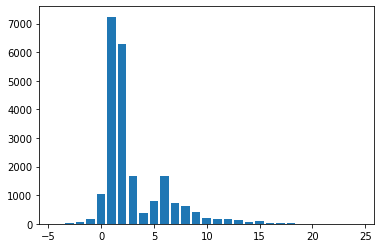

In [4]:
total_goals = np.unique(y_train, return_counts=True)

print(total_goals[1])
plt.bar(total_goals[0],total_goals[1])

 # Fitting the data to a Multiple Linear Regression Model Without normalization

In [5]:
# Fitting the data to a Multiple Linear Regression Model

# Fitting the multiple linear regresion to the training set
mlr_obj_no_norm = LinearRegression()
mlr_obj_no_norm.fit(X_train, y_train)

num_culmn_raw  = X_train[0,:]

print("The weight parameters are:")

for idx, col_name in enumerate(dataset_test.columns[:len(num_culmn_raw)]):
    print("({}) {}: {}".format(idx, col_name, mlr_obj_no_norm.coef_[0][idx]))

# Predicting on the test set
mlr_y_pred_no_norm = mlr_obj_no_norm.predict(X_test)


The weight parameters are:
(0) assists: 1.4726668284470161
(1) attempted_passes: 0.01545744613064909
(2) big_chances_created: -0.5208636403074328
(3) big_chances_missed: 0.458141203889362
(4) bonus: 1.1020962227269555
(5) bps: 0.1652418198356562
(6) clean_sheets: 1.1481031723496198
(7) clearances_blocks_interceptions: -0.07507771146228384
(8) completed_passes: -0.02544478566964795
(9) creativity: 0.03851719290111244
(10) dribbles: -0.14204465667581517
(11) ea_index: -1.2933126791736527e-12
(12) element: -4.7404750993074174e-05
(13) errors_leading_to_goal: 0.2032060445783611
(14) errors_leading_to_goal_attempt: 0.1454980481257589
(15) fixture: -0.0007909944988526742
(16) fouls: 0.1471355776862056
(17) goals_conceded: -0.2644660613842095
(18) goals_scored: 1.4511637621615607
(19) ict_index: -0.34507141946938447
(20) id: 1.629433677763359e-06
(21) influence: 0.03304132073752403
(22) key_passes: -0.20090347125218538
(23) loaned_in: 1.4190038033490282e-15
(24) loaned_out: 5.007279313407054e

# Calculate the Mean Squared Error for the model

In [6]:
print("Mean Squared Error for MLR:", metrics.mean_squared_error(y_test, mlr_y_pred_no_norm))

Mean Squared Error for MLR: 0.456945754855707


# Normalizing the data to make sure no one variable pulls to much on the prediction. (Do We Need to Normalize)

In [7]:
# #Normalizing the features
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)

# Fitting the data to a Multiple Linear Regression Model

In [8]:
# Fitting the multiple linear regresion to the training set
mlr_obj = LinearRegression()
mlr_obj.fit(X_train, y_train)


num_culmn_raw  = X_train[0,:]

print("The weight parameters are:")

for idx, col_name in enumerate(dataset_test.columns[:len(num_culmn_raw)]):
    print("({}) {}: {}".format(idx, col_name, mlr_obj.coef_[0][idx]))

# Predicting on the test set
mlr_y_pred = mlr_obj.predict(X_test)


The weight parameters are:
(0) assists: 0.4570656466860118
(1) attempted_passes: 0.33966109521645593
(2) big_chances_created: -0.16567312877747742
(3) big_chances_missed: 0.13275176407211708
(4) bonus: 0.7696469494591232
(5) bps: 1.7793728276277467
(6) clean_sheets: 0.48270164112965164
(7) clearances_blocks_interceptions: -0.2600158945708556
(8) completed_passes: -0.5089270877867001
(9) creativity: 0.542925397800265
(10) dribbles: -0.1637328865455977
(11) ea_index: -1.0352274593117272e-12
(12) element: -0.007755455742339545
(13) errors_leading_to_goal: 0.02263905909529091
(14) errors_leading_to_goal_attempt: 0.0211735003686839
(15) fixture: -0.08688253689977166
(16) fouls: 0.14560689226819207
(17) goals_conceded: -0.31634754962435774
(18) goals_scored: 0.4844815778871821
(19) ict_index: -1.2290879648349322
(20) id: 0.010691661162996913
(21) influence: 0.5009741774857551
(22) key_passes: -0.20968383144438402
(23) loaned_in: -3.874095488853868e-12
(24) loaned_out: 5.977440764581843e-13
(

# Calculate the Mean Squared Error for the model

In [9]:
print("Mean Squared Error for MLR:", metrics.mean_squared_error(y_test, mlr_y_pred))

Mean Squared Error for MLR: 0.45694575485574146


# Using backwards elimination to trim the data

In [10]:
def backwardElimination(x, sl):
    
    numVars = len(x[0])
    for i in range(0, numVars):
        
        #print("check:", i)

        obj_OLS = sm.OLS(endog = y, exog = x).fit()
        maxVar = max(obj_OLS.pvalues).astype(float)
        #print(maxVar)

        if maxVar > sl:
            
            for j in range(0, numVars - i):
                
                if (obj_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    dataset_test.drop([dataset_test.columns[j]], axis=1, inplace=True)
                    
                    
    obj_OLS.summary()
    return x


X = X.astype(float)
SL = 0.05
X_sig = X[:,:]
X_Modeled = backwardElimination(X_sig, SL)

# Now run the trimed data with a linear regression model

In [11]:
# Split the data
X_sig_train, X_sig_test, y_sig_train, y_sig_test = train_test_split(
    X_Modeled, y, test_size = 0.3)

mlr_bw_obj = LinearRegression()
mlr_bw_obj.fit(X_sig_train, y_sig_train)

y_sig_pred = mlr_bw_obj.predict(X_sig_test)

num_culmn_sig  = X_Modeled[0,:]

print("The weight parameters are:")

for idx, col_name in enumerate(dataset_test.columns[:len(num_culmn_sig)]):
    print("({}) {}: {}".format(idx, col_name, mlr_bw_obj.coef_[0][idx]))

#print("Mean Squared Error for MLR and Backward Elimination:", metrics.mean_squared_error(y_sig_test, y_sig_pred))

The weight parameters are:
(0) assists: 1.4928480477880086
(1) attempted_passes: 0.015312117386343223
(2) big_chances_created: -0.5227978516927808
(3) big_chances_missed: 0.45218084242672607
(4) bonus: 1.120711237792643
(5) bps: 0.16258620102459376
(6) clean_sheets: 1.1750856080921797
(7) clearances_blocks_interceptions: -0.0734590868780265
(8) completed_passes: -0.026052353815877734
(9) creativity: 0.039300998245864804
(10) dribbles: -0.1417206628231629
(11) element: -2.0142711165460625e-05
(12) errors_leading_to_goal: 0.1899546790290933
(13) errors_leading_to_goal_attempt: 0.15176627161044065
(14) fixture: -0.0004595169890682562
(15) fouls: 0.14568445091052318
(16) goals_conceded: -0.2640026736052145
(17) goals_scored: 1.463992597765598
(18) ict_index: -0.3340646826622143
(19) id: -1.1800763879854514e-05
(20) influence: 0.0319867478440351
(21) key_passes: -0.21865226521641665
(22) loaned_in: 3.3534980348193244e-13
(23) loaned_out: 2.065930759798107e-12
(24) minutes: 0.007058164446902

# MLR and Backward Elimination Mean Squared Error

In [12]:
print("Mean Squared Error for MLR and Backward Elimination:", metrics.mean_squared_error(y_sig_test, y_sig_pred))

Mean Squared Error for MLR and Backward Elimination: 0.4491866517910291


# Examine a Decison Tree regresion

In [13]:
dtr_obj = DecisionTreeRegressor()
dtr_obj.fit(X_train, y_train)

dtr_y_pred = dtr_obj.predict(X_test)

print("Mean Squared Error for Decision Tree:", metrics.mean_squared_error(y_test, dtr_y_pred))

Mean Squared Error for Decision Tree: 0.4673601528500159


# Examine a Random Forrest model

In [14]:
num_tree = []
msqe = []

for n in range (10, 301, 10):
    
    num_tree.append(n)
    
    randf_obj = RandomForestRegressor(n_estimators=n)
    randf_obj.fit(X_train, y_train)
    
    randf_y_pred = randf_obj.predict(X_test)
    
    mean_sqr_eror = metrics.mean_squared_error(y_test, 
                                               randf_y_pred)
    
    # print(mean_sqr_eror)
    
    msqe.append(mean_sqr_eror)
    
print('Lowest testing error =', min(msqe))
print('Associated number of trees (n_estimator) =', 
      num_tree[msqe.index(min(msqe))])

/Users/suyash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/suyash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/suyash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/suyash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

Lowest testing error = 0.22195223768708203
Associated number of trees (n_estimator) = 160


In [15]:
print('Lowest testing error =', min(msqe))
print('Associated number of trees (n_estimator) =', 
      num_tree[msqe.index(min(msqe))])

Lowest testing error = 0.22195223768708203
Associated number of trees (n_estimator) = 160


# PCA model examination

In [16]:
num_tree_pca = []
pca_error = []

for n in range(1, len(num_culmn_raw)):
    num_tree_pca.append(n)
    
    pca_obj = PCA(n_components=n)
    X_PCA_train = pca_obj.fit_transform(X_train)
    X_PCA_test = pca_obj.transform(X_test)
    components_variance = pca_obj.explained_variance_ratio_

    # Fit a linear regression to the training set
    mlr_pca_obj = LinearRegression()
    mlr_pca_obj.fit(X_PCA_train, y_train)

    y_mlr_pca_pred = mlr_pca_obj.predict(X_PCA_test)
    
    pca_error.append(metrics.mean_squared_error(y_test, y_mlr_pca_pred))
    
    #print(n)
    #print(metrics.mean_squared_error(y_test, y_mlr_pca_pred))
    
print('Lowest testing error =', min(pca_error))
print('Associated number of components (n_components) =', 
      num_tree_pca[pca_error.index(min(pca_error))])

Lowest testing error = 0.4569440207096578
Associated number of components (n_components) = 47


# K-Fold Tests

In [17]:
# Multiple Linear Regression Raw
modelAccuracies = cross_val_score(estimator=mlr_obj, X=X_train, y=y_train, cv=10)
print("MLR Mean:", modelAccuracies.mean())
print("MLR Standard Deviation:", modelAccuracies.std())

print()

# Multilinear Regression with Backward Elimination
modelAccuracies = cross_val_score(estimator=mlr_bw_obj, X=X_train, y=y_train, cv=10)
print("MLR/Backward Elimination Mean:", modelAccuracies.mean())
print("MLR/Backward Elimination Deviation:", modelAccuracies.std())

print()

# Decision Tree Model
modelAccuracies = cross_val_score(estimator=dtr_obj, X=X_train, y=y_train, cv=10)
print("Decission Tree Mean:", modelAccuracies.mean())
print("Decission Tree Deviation:", modelAccuracies.std())

print()

# Random Forest Model
randf_obj = RandomForestRegressor(n_estimators=num_tree[msqe.index(min(msqe))])
modelAccuracies = cross_val_score(estimator=randf_obj, X=X_train, y=y_train, cv=10)
print("Random Forest Mean:", modelAccuracies.mean())
print("Random Forest Standard Deviation:", modelAccuracies.std())

print()

# PCA Model
modelAccuracies = cross_val_score(estimator=mlr_pca_obj, X=X_train, y=y_train, cv=5)
print("MLR/PCA Mean:", modelAccuracies.mean())
print("MLR/PCA Standard Deviation:", modelAccuracies.std())

MLR Mean: 0.9468272096126711
MLR Standard Deviation: 0.0025675732600164195

MLR/Backward Elimination Mean: 0.9468272096126711
MLR/Backward Elimination Deviation: 0.0025675732600164195

Decission Tree Mean: 0.9482898010660454
Decission Tree Deviation: 0.004477841599959785



/Users/suyash/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/suyash/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/suyash/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/suyash/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataCon

Random Forest Mean: 0.9743497619684035
Random Forest Standard Deviation: 0.0017494717171341542

MLR/PCA Mean: 0.9468048051957456
MLR/PCA Standard Deviation: 0.0005443265027909932
